In [1]:
!git clone https://github.com/RockatanskyV8/deep-learning.git

Cloning into 'deep-learning'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 127 (delta 76), reused 101 (delta 50), pack-reused 0
Receiving objects: 100% (127/127), 27.77 KiB | 917.00 KiB/s, done.
Resolving deltas: 100% (76/76), done.


In [8]:
%cd deep-learning
!git pull

[Errno 2] No such file or directory: 'deep-learning'
/content/deep-learning
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/RockatanskyV8/deep-learning
   5f14ec4..54303f0  main       -> origin/main
Updating 5f14ec4..54303f0
Fast-forward
 df_points.txt | 10001 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 10001 insertions(+)
 create mode 100644 df_points.txt


In [3]:
import pandas as pd
import numpy as np

from Plots  import *
from Modelos  import *

from Treinamento import Treinamento

In [4]:
class Validacao_Cruzada():
    def __init__(self, dataset, model, epochs = 2000, batch_size = 25, early_stopping_epochs = 60):
        self.dataset               = dataset
        self.model                 = model
        self.epochs                = epochs
        self.early_stopping_epochs = early_stopping_epochs
        self.batch_size            = batch_size
    
    def classificacao(self, optimizer, criterion):
        t = Treinamento(self.dataset, self.epochs, self.batch_size, self.early_stopping_epochs)
        model, train_loss, valid_loss = t.train_cross_validation(self.model, optimizer, criterion)

        return model, train_loss, valid_loss, t.train, t.valid

class Validacao_Cruzada2():
    def __init__(self, dataset, model, epochs = 2000, batch_size = 25, early_stopping_epochs = 60):
        self.dataset               = dataset
        self.model                 = model
        self.epochs                = epochs
        self.early_stopping_epochs = early_stopping_epochs
        self.batch_size            = batch_size
    
    def classificacao(self, optimizer, criterion):
        t = Treinamento(self.dataset, self.epochs, self.batch_size, self.early_stopping_epochs)
        model, train_loss, valid_loss = t.train_cross_validation_dataloader(self.model, optimizer, criterion)

        return model, train_loss, valid_loss, t.train, t.valid

In [5]:
def plots(model, train_loss, valid_loss, X_test, y_test):
  p = Plots()
  p.plot_losses(train_loss, valid_loss)

  accuracy_final = p.get_accuracy(model, X_test, y_test)
  print("\n############ Acurácia ############")
  print(accuracy_final)
  print("############ -------- ############")

In [6]:
def run_models(dataset, model, optimizer, criterion,
               run_epochs = 2000, 
               run_batch_size = 25, 
               run_early_stopping_epochs = 60):
  
  runner = Validacao_Cruzada(dataset, model, 
                            epochs = run_epochs, 
                            batch_size = run_batch_size, 
                            early_stopping_epochs = run_early_stopping_epochs)
  
  return runner.classificacao(optimizer, criterion)

In [10]:
df = pd.read_csv('df_points.txt', sep='\t', index_col=[0])

# Tentativa CV1

In [11]:
input_features = 3
output_size = 2
p = 0.5

model1 = GeradorRede(input_features , [Camada(500, nn.ReLU(), nn.Dropout(p) ),
                                       Camada(250, nn.ReLU(), nn.Dropout(p) ),
                                       Camada(100, nn.ReLU(), nn.Dropout(p) ),
                                       Camada( 10, nn.ReLU()),
                                       Camada(  2, nn.Softmax(dim=-1) ),
                                       ])
print(model1)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=500, out_features=250, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=250, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=100, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


In [12]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)

epochs = 2000
batch_size = 25
early_stopping_epochs = 50 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Validacao_Cruzada(df, model1, epochs, batch_size, early_stopping_epochs)
model1, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

Index 1


100%|██████████| 2000/2000 [00:04<00:00, 409.40it/s]


Index 2


100%|██████████| 2000/2000 [00:05<00:00, 370.50it/s]


Index 3


100%|██████████| 2000/2000 [00:04<00:00, 401.96it/s]


Index 4


100%|██████████| 2000/2000 [00:04<00:00, 435.68it/s]

Training interrupted by early stopping!
Total epochs run: 2000
Best model found at epoch 949 with valid loss 0.33180245757102966 and training loss 0.3133982717990875
Total training time: 0:00:19.891589


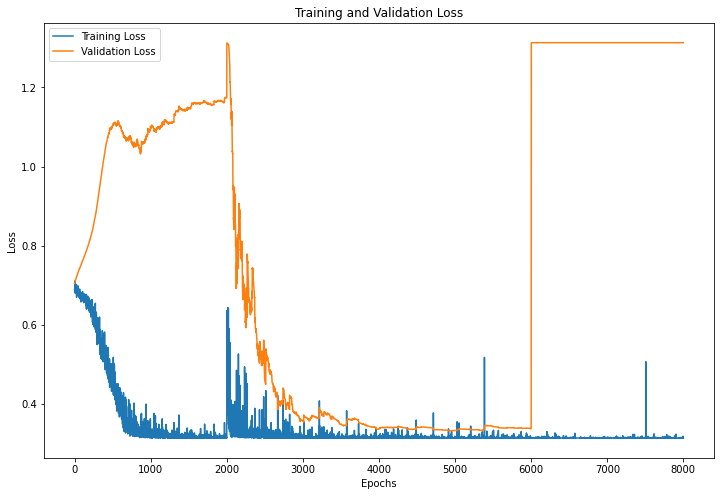


############ Acurácia ############
0.508
############ -------- ############


In [13]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model1, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

# Tentativa CV2

In [14]:
input_features = 3
output_size = 2
p = 0.5

model2 = GeradorRede(input_features , [Camada(500, nn.ReLU(), nn.Dropout(p) ),
                                       Camada(250, nn.ReLU(), nn.Dropout(p) ),
                                       Camada(100, nn.ReLU(), nn.Dropout(p) ),
                                       Camada( 10, nn.ReLU()),
                                       Camada(  2, nn.Softmax(dim=-1) ),
                                       ])
print(model2)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=500, out_features=250, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=250, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=100, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


In [15]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)

epochs = 2000
batch_size = 25
early_stopping_epochs = 50 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Validacao_Cruzada2(df, model1, epochs, batch_size, early_stopping_epochs)
model1, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 13%|█▎        | 257/2000 [02:58<20:10,  1.44it/s]

Training interrupted by early stopping!
Total epochs run: 258
Best model found at epoch 207 with valid loss 31.095216006040573 and training loss 153.73787584900856
Total training time: 0:02:58.454858


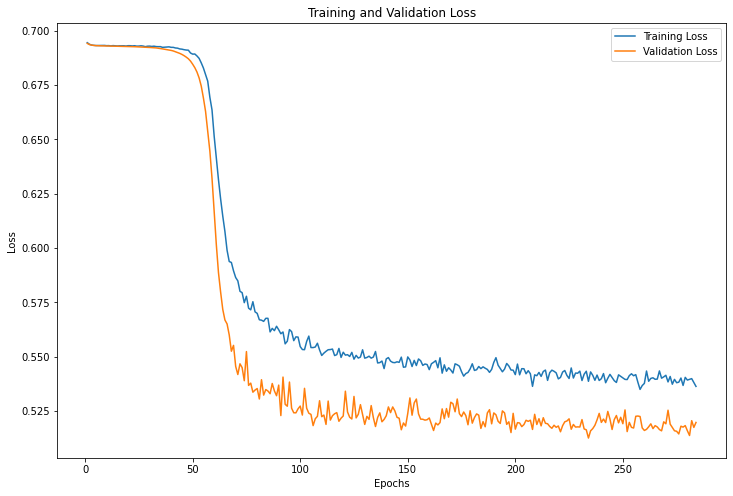


############ Acurácia ############
0.5026666666666667
############ -------- ############


In [24]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model2, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

# Segunda Tentativa CV2

In [19]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(1500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(1000, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 250, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 100, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(  10, nn.ReLU()))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model3 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01)

print(model3)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=1500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1500, out_features=1000, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=1000, out_features=500, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=500, out_features=250, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=250, out_features=100, bias=True)
    (13): ReLU()
    (14): Dropout(p=0.5, inplace=False)
    (15): Linear(in_features=100, out_features=10, bias=True)
    (16): ReLU()
    (17): Linear(in_features=10, out_features=2, bias=True)
    (18): Softmax(dim=-1)
  )
)


In [21]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01)

epochs = 2000
batch_size = 25
early_stopping_epochs = 50 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Validacao_Cruzada2(df, model3, epochs, batch_size, early_stopping_epochs)
model3, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 14%|█▍        | 284/2000 [22:05<2:13:31,  4.67s/it]

Training interrupted by early stopping!
Total epochs run: 285
Best model found at epoch 234 with valid loss 30.7485371530056 and training loss 150.80659386515617
Total training time: 0:22:06.001742


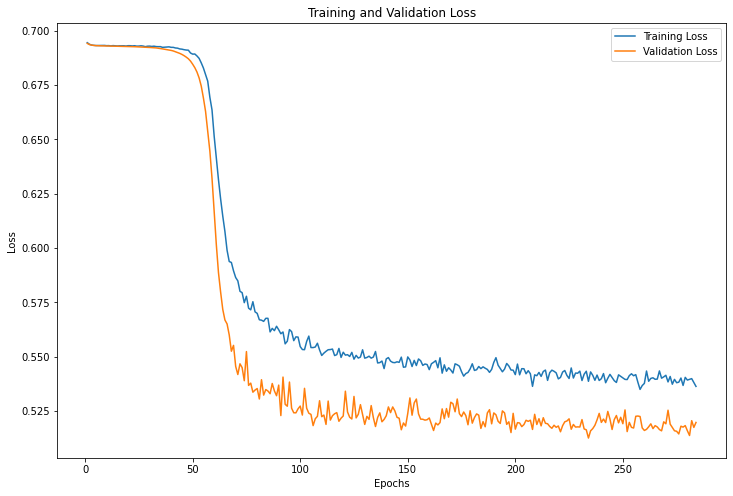


############ Acurácia ############
0.7733333333333333
############ -------- ############


In [23]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model3, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))